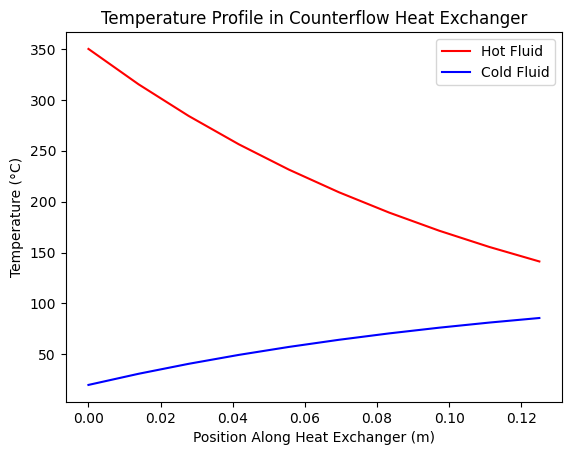

Temperatures at each layer:
Layer 1: 350.00 °C (Hot Fluid), 20.00 °C (Cold Fluid)
Layer 2: 315.26 °C (Hot Fluid), 30.94 °C (Cold Fluid)
Layer 3: 284.18 °C (Hot Fluid), 40.73 °C (Cold Fluid)
Layer 4: 256.36 °C (Hot Fluid), 49.48 °C (Cold Fluid)
Layer 5: 231.48 °C (Hot Fluid), 57.32 °C (Cold Fluid)
Layer 6: 209.22 °C (Hot Fluid), 64.33 °C (Cold Fluid)
Layer 7: 189.30 °C (Hot Fluid), 70.60 °C (Cold Fluid)
Layer 8: 171.47 °C (Hot Fluid), 76.21 °C (Cold Fluid)
Layer 9: 155.53 °C (Hot Fluid), 81.23 °C (Cold Fluid)
Layer 10: 141.26 °C (Hot Fluid), 85.72 °C (Cold Fluid)

Total Heat Transfer: 2250.23 Watts
Log Mean Temperature Difference: 154.02 °C

Total Weight of the Heat Exchanger: 5.99 kg


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Given parameters
mass_flow_rate_hot = 0.010  # Mass flow rate of hot fluid (kg/s)
mass_flow_rate_cold = 0.034  # Mass flow rate of cold fluid (kg/s)
inlet_temp_hot = 623.15  # Inlet temperature of hot fluid (K)
inlet_temp_cold = 293.15  # Inlet temperature of cold fluid (K)
specific_heat_hot = 1078.0  # Specific heat capacity of hot fluid (J/(kg*K))
specific_heat_cold = 1007.0  # Specific heat capacity of cold fluid (J/(kg*K))
contact_area = 0.023808  # Contact area for each layer (m^2)
num_layers = 10  # Number of layers in series
overall_heat_transfer_coefficient = 45.33154074  # Overall heat transfer coefficient (W/(m^2*K))
layer_length = 0.0125  # Length of each layer (m)
layer_weight = 0.599  # Weight of each layer (kg)

# Calculate thermal resistance for each layer
thermal_resistances = layer_length / (overall_heat_transfer_coefficient * contact_area)

# Set initial condition
initial_condition = [inlet_temp_hot]

# Define the ODE system
def heat_exchanger_ode(T, x):
    # Calculate total thermal resistance for all layers
    total_thermal_resistance = np.sum(thermal_resistances)

    # Calculate dT/dx using the thermal resistance approach
    dTdx = -(T - inlet_temp_cold) / (total_thermal_resistance * mass_flow_rate_hot * specific_heat_hot)
    return dTdx

# Define positions along the heat exchanger
x_positions = np.linspace(0, num_layers * layer_length, num_layers)

# Solve the ODE
result = odeint(heat_exchanger_ode, initial_condition, x_positions)

# Extract temperatures and convert to Celsius
temp_hot = result[:, 0] - 273.15
temp_cold = (inlet_temp_cold + (inlet_temp_hot - result[:, 0]) * (mass_flow_rate_hot / mass_flow_rate_cold) * (specific_heat_hot / specific_heat_cold)) - 273.15

# Calculate total heat transfer
total_heat_transfer = mass_flow_rate_hot * specific_heat_hot * (inlet_temp_hot - result[-1, 0])

# Calculate log mean temperature difference
delta_T_1 = temp_hot[0] - temp_cold[0]
delta_T_2 = temp_hot[-1] - temp_cold[-1]
log_mean_temp_difference = (delta_T_1 - delta_T_2) / np.log(delta_T_1 / delta_T_2)

# Calculate total weight of the heat exchanger
total_weight = num_layers * layer_weight

# Plotting
plt.plot(x_positions, temp_hot, label="Hot Fluid", color="red")
plt.plot(x_positions, temp_cold, label="Cold Fluid", color="blue")
plt.xlabel("Position Along Heat Exchanger (m)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Profile in Counterflow Heat Exchanger")
plt.legend()
plt.show()

# List temperatures at each layer
print("Temperatures at each layer:")
for i in range(num_layers):
    print(f"Layer {i + 1}: {temp_hot[i]:.2f} °C (Hot Fluid), {temp_cold[i]:.2f} °C (Cold Fluid)")

print("\nTotal Heat Transfer: {:.2f} Watts".format(total_heat_transfer))
print("Log Mean Temperature Difference: {:.2f} °C".format(log_mean_temp_difference))
print("\nTotal Weight of the Heat Exchanger: {:.2f} kg".format(total_weight))


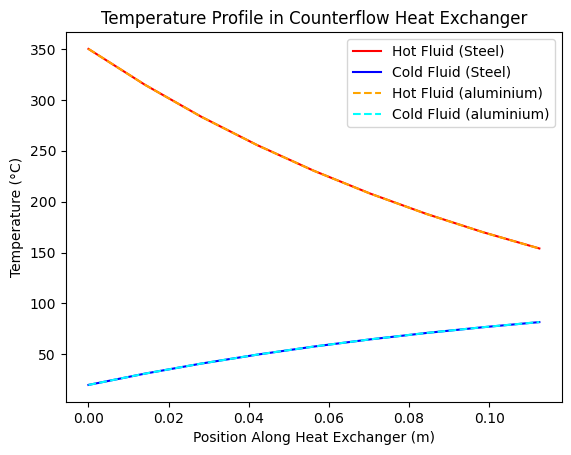

General information:
Number of layers: 9
Height: 11.25 cm
Pressure drop (hot): 45.00 Pa
Pressure drop (cold): 135.00 Pa

Results for Steel:
Total Heat Transfer: 2112.58 Watts
Log Mean Temperature Difference: 169.75 °C
Total Weight of the Heat Exchanger: 5.39 kg

Results for aluminium:
Total Heat Transfer: 2113.39 Watts
Log Mean Temperature Difference: 169.67 °C
Total Weight of the Heat Exchanger: 2.29 kg


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def heat_exchanger_simulation(overall_heat_transfer_coefficient, layer_weight):
    # Given parameters
    mass_flow_rate_hot = 0.010  # Mass flow rate of hot fluid (kg/s)
    mass_flow_rate_cold = 0.034  # Mass flow rate of cold fluid (kg/s)
    inlet_temp_hot = 623.15  # Inlet temperature of hot fluid (K)
    inlet_temp_cold = 293.15  # Inlet temperature of cold fluid (K)
    specific_heat_hot = 1078.0  # Specific heat capacity of hot fluid (J/(kg*K))
    specific_heat_cold = 1007.0  # Specific heat capacity of cold fluid (J/(kg*K))
    contact_area = 0.023808  # Contact area for each layer (m^2)
    num_layers = 9  # Number of layers in series
    layer_length = 0.0125  # Length of each layer (m)
    pressure_drop_cold = 15 #(Pa)
    pressure_drop_hot = 5 #(Pa}

    # Calculate thermal resistance for each layer
    thermal_resistances = layer_length / (overall_heat_transfer_coefficient * contact_area)

    # Set initial condition
    initial_condition = [inlet_temp_hot]

    # Define the ODE system
    def heat_exchanger_ode(T, x):
        # Calculate total thermal resistance for all layers
        total_thermal_resistance = np.sum(thermal_resistances)

        # Calculate dT/dx using the thermal resistance approach
        dTdx = -(T - inlet_temp_cold) / (total_thermal_resistance * mass_flow_rate_hot * specific_heat_hot)
        return dTdx

    # Define positions along the heat exchanger
    x_positions = np.linspace(0, num_layers * layer_length, num_layers)

    # Solve the ODE
    result = odeint(heat_exchanger_ode, initial_condition, x_positions)

    # Extract temperatures and convert to Celsius
    temp_hot = result[:, 0] - 273.15
    temp_cold = (inlet_temp_cold + (inlet_temp_hot - result[:, 0]) * (mass_flow_rate_hot / mass_flow_rate_cold) * (specific_heat_hot / specific_heat_cold)) - 273.15

    # Calculate total heat transfer
    total_heat_transfer = mass_flow_rate_hot * specific_heat_hot * (inlet_temp_hot - result[-1, 0])

    # Calculate log mean temperature difference
    delta_T_1 = temp_hot[0] - temp_cold[0]
    delta_T_2 = temp_hot[-1] - temp_cold[-1]
    log_mean_temp_difference = (delta_T_1 - delta_T_2) / np.log(delta_T_1 / delta_T_2)

    # Calculate total weight of the heat exchanger
    total_weight = num_layers * layer_weight
    
    #Calculate total pressure drop
    pressure_total_hot = num_layers * pressure_drop_hot
    pressure_total_cold = num_layers * pressure_drop_cold

    return x_positions, temp_hot, temp_cold, total_heat_transfer, log_mean_temp_difference, total_weight, pressure_total_hot, pressure_total_cold, num_layers, layer_length

# Given parameters for steel
overall_heat_transfer_coefficient_steel = 45.33154074  # Overall heat transfer coefficient for steel (W/(m^2*K))
layer_weight_steel = 0.599  # Weight of each layer for steel (kg)

# Given parameters for aluminium
overall_heat_transfer_coefficient_aluminium = 45.35971499  # Overall heat transfer coefficient for aluminium (W/(m^2*K))
layer_weight_aluminium = 0.255  # Weight of each layer for aluminium (kg)

# Run simulations for steel and aluminium
result_steel = heat_exchanger_simulation(overall_heat_transfer_coefficient_steel, layer_weight_steel)
result_aluminium = heat_exchanger_simulation(overall_heat_transfer_coefficient_aluminium, layer_weight_aluminium)

# Plotting
plt.plot(result_steel[0], result_steel[1], label="Hot Fluid (Steel)", color="red")
plt.plot(result_steel[0], result_steel[2], label="Cold Fluid (Steel)", color="blue")

plt.plot(result_aluminium[0], result_aluminium[1], label="Hot Fluid (aluminium)", color="orange", linestyle="--")
plt.plot(result_aluminium[0], result_aluminium[2], label="Cold Fluid (aluminium)", color="cyan", linestyle="--")

plt.xlabel("Position Along Heat Exchanger (m)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Profile in Counterflow Heat Exchanger")
plt.legend()
plt.show()

print("General information:")
print("Number of layers: {:.0f}".format(result_steel[8]))
print("Height: {:.2f} cm".format(100*result_steel[9]*result_steel[8]))
print("Pressure drop (hot): {:.2f} Pa".format(result_steel[6]))
print("Pressure drop (cold): {:.2f} Pa\n".format(result_steel[7]))


# Display results for steel
print("Results for Steel:")
print("Total Heat Transfer: {:.2f} Watts".format(result_steel[3]))
print("Log Mean Temperature Difference: {:.2f} °C".format(result_steel[4]))
print("Total Weight of the Heat Exchanger: {:.2f} kg".format(result_steel[5]))

# Display results for aluminium
print("\nResults for aluminium:")
print("Total Heat Transfer: {:.2f} Watts".format(result_aluminium[3]))
print("Log Mean Temperature Difference: {:.2f} °C".format(result_aluminium[4]))
print("Total Weight of the Heat Exchanger: {:.2f} kg".format(result_aluminium[5]))


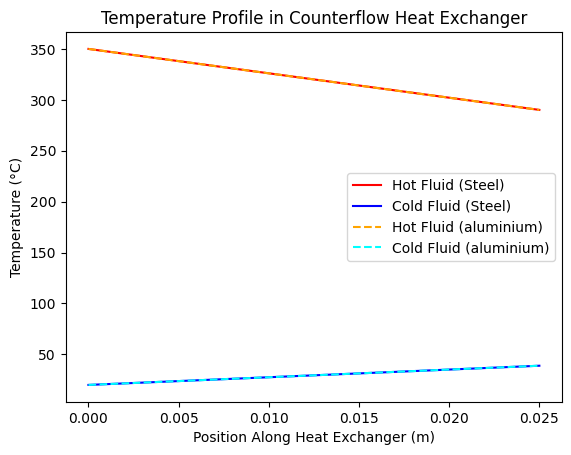

General information:
Number of layers: 2
Height: 2.50 cm
Pressure drop (hot): 10.00 Pa
Pressure drop (cold): 30.00 Pa

Results for Steel:
Total Heat Transfer: 645.52 Watts
Log Mean Temperature Difference: 288.85 °C
Total Weight of the Heat Exchanger: 1.20 kg

Results for aluminium:
Total Heat Transfer: 645.89 Watts
Log Mean Temperature Difference: 288.82 °C
Total Weight of the Heat Exchanger: 0.51 kg


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def heat_exchanger_simulation(overall_heat_transfer_coefficient, layer_weight):
    # Given parameters
    mass_flow_rate_hot = 0.010  # Mass flow rate of hot fluid (kg/s)
    mass_flow_rate_cold = 0.034  # Mass flow rate of cold fluid (kg/s)
    inlet_temp_hot = 623.15  # Inlet temperature of hot fluid (K)
    inlet_temp_cold = 293.15  # Inlet temperature of cold fluid (K)
    specific_heat_hot = 1078.0  # Specific heat capacity of hot fluid (J/(kg*K))
    specific_heat_cold = 1007.0  # Specific heat capacity of cold fluid (J/(kg*K))
    contact_area = 0.023808  # Contact area for each layer (m^2)
    num_layers = 2  # Number of layers in series
    layer_length = 0.0125  # Length of each layer (m)
    pressure_drop_cold = 15 #(Pa)
    pressure_drop_hot = 5 #(Pa}

    # Calculate thermal resistance for each layer
    thermal_resistances = layer_length / (overall_heat_transfer_coefficient * contact_area)

    # Set initial condition
    initial_condition = [inlet_temp_hot]

    # Define the ODE system
    def heat_exchanger_ode(T, x):
        # Calculate total thermal resistance for all layers
        total_thermal_resistance = np.sum(thermal_resistances)

        # Calculate dT/dx using the thermal resistance approach
        dTdx = -(T - inlet_temp_cold) / (total_thermal_resistance * mass_flow_rate_hot * specific_heat_hot)
        return dTdx

    # Define positions along the heat exchanger
    x_positions = np.linspace(0, num_layers * layer_length, num_layers)

    # Solve the ODE
    result = odeint(heat_exchanger_ode, initial_condition, x_positions)

    # Extract temperatures and convert to Celsius
    temp_hot = result[:, 0] - 273.15
    temp_cold = (inlet_temp_cold + (inlet_temp_hot - result[:, 0]) * (mass_flow_rate_hot / mass_flow_rate_cold) * (specific_heat_hot / specific_heat_cold)) - 273.15

    # Calculate total heat transfer
    total_heat_transfer = mass_flow_rate_hot * specific_heat_hot * (inlet_temp_hot - result[-1, 0])

    # Calculate log mean temperature difference
    delta_T_1 = temp_hot[0] - temp_cold[0]
    delta_T_2 = temp_hot[-1] - temp_cold[-1]
    log_mean_temp_difference = (delta_T_1 - delta_T_2) / np.log(delta_T_1 / delta_T_2)

    # Calculate total weight of the heat exchanger
    total_weight = num_layers * layer_weight
    
    #Calculate total pressure drop
    pressure_total_hot = num_layers * pressure_drop_hot
    pressure_total_cold = num_layers * pressure_drop_cold

    return x_positions, temp_hot, temp_cold, total_heat_transfer, log_mean_temp_difference, total_weight, pressure_total_hot, pressure_total_cold, num_layers, layer_length

# Given parameters for steel
overall_heat_transfer_coefficient_steel = 45.33154074  # Overall heat transfer coefficient for steel (W/(m^2*K))
layer_weight_steel = 0.599  # Weight of each layer for steel (kg)

# Given parameters for aluminium
overall_heat_transfer_coefficient_aluminium = 45.35971499  # Overall heat transfer coefficient for aluminium (W/(m^2*K))
layer_weight_aluminium = 0.255  # Weight of each layer for aluminium (kg)

# Run simulations for steel and aluminium
result_steel = heat_exchanger_simulation(overall_heat_transfer_coefficient_steel, layer_weight_steel)
result_aluminium = heat_exchanger_simulation(overall_heat_transfer_coefficient_aluminium, layer_weight_aluminium)

# Plotting
plt.plot(result_steel[0], result_steel[1], label="Hot Fluid (Steel)", color="red")
plt.plot(result_steel[0], result_steel[2], label="Cold Fluid (Steel)", color="blue")

plt.plot(result_aluminium[0], result_aluminium[1], label="Hot Fluid (aluminium)", color="orange", linestyle="--")
plt.plot(result_aluminium[0], result_aluminium[2], label="Cold Fluid (aluminium)", color="cyan", linestyle="--")

plt.xlabel("Position Along Heat Exchanger (m)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Profile in Counterflow Heat Exchanger")
plt.legend()
plt.show()

print("General information:")
print("Number of layers: {:.0f}".format(result_steel[8]))
print("Height: {:.2f} cm".format(100*result_steel[9]*result_steel[8]))
print("Pressure drop (hot): {:.2f} Pa".format(result_steel[6]))
print("Pressure drop (cold): {:.2f} Pa\n".format(result_steel[7]))


# Display results for steel
print("Results for Steel:")
print("Total Heat Transfer: {:.2f} Watts".format(result_steel[3]))
print("Log Mean Temperature Difference: {:.2f} °C".format(result_steel[4]))
print("Total Weight of the Heat Exchanger: {:.2f} kg".format(result_steel[5]))

# Display results for aluminium
print("\nResults for aluminium:")
print("Total Heat Transfer: {:.2f} Watts".format(result_aluminium[3]))
print("Log Mean Temperature Difference: {:.2f} °C".format(result_aluminium[4]))
print("Total Weight of the Heat Exchanger: {:.2f} kg".format(result_aluminium[5]))


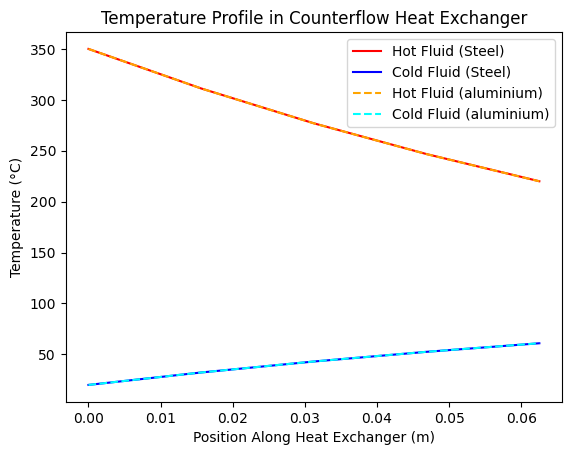

General information:
Number of layers: 5
Height: 6.25 cm
Pressure drop (hot): 25.00 Pa
Pressure drop (cold): 75.00 Pa

Results for Steel:
Total Heat Transfer: 1400.98 Watts
Log Mean Temperature Difference: 234.26 °C
Total Weight of the Heat Exchanger: 3.00 kg

Results for aluminium:
Total Heat Transfer: 1401.65 Watts
Log Mean Temperature Difference: 234.21 °C
Total Weight of the Heat Exchanger: 1.27 kg


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def heat_exchanger_simulation(overall_heat_transfer_coefficient, layer_weight):
    # Given parameters
    mass_flow_rate_hot = 0.010  # Mass flow rate of hot fluid (kg/s)
    mass_flow_rate_cold = 0.034  # Mass flow rate of cold fluid (kg/s)
    inlet_temp_hot = 623.15  # Inlet temperature of hot fluid (K)
    inlet_temp_cold = 293.15  # Inlet temperature of cold fluid (K)
    specific_heat_hot = 1078.0  # Specific heat capacity of hot fluid (J/(kg*K))
    specific_heat_cold = 1007.0  # Specific heat capacity of cold fluid (J/(kg*K))
    contact_area = 0.023808  # Contact area for each layer (m^2)
    num_layers = 5  # Number of layers in series
    layer_length = 0.0125  # Length of each layer (m)
    pressure_drop_cold = 15 #(Pa)
    pressure_drop_hot = 5 #(Pa}

    # Calculate thermal resistance for each layer
    thermal_resistances = layer_length / (overall_heat_transfer_coefficient * contact_area)

    # Set initial condition
    initial_condition = [inlet_temp_hot]

    # Define the ODE system
    def heat_exchanger_ode(T, x):
        # Calculate total thermal resistance for all layers
        total_thermal_resistance = np.sum(thermal_resistances)

        # Calculate dT/dx using the thermal resistance approach
        dTdx = -(T - inlet_temp_cold) / (total_thermal_resistance * mass_flow_rate_hot * specific_heat_hot)
        return dTdx

    # Define positions along the heat exchanger
    x_positions = np.linspace(0, num_layers * layer_length, num_layers)

    # Solve the ODE
    result = odeint(heat_exchanger_ode, initial_condition, x_positions)

    # Extract temperatures and convert to Celsius
    temp_hot = result[:, 0] - 273.15
    temp_cold = (inlet_temp_cold + (inlet_temp_hot - result[:, 0]) * (mass_flow_rate_hot / mass_flow_rate_cold) * (specific_heat_hot / specific_heat_cold)) - 273.15

    # Calculate total heat transfer
    total_heat_transfer = mass_flow_rate_hot * specific_heat_hot * (inlet_temp_hot - result[-1, 0])

    # Calculate log mean temperature difference
    delta_T_1 = temp_hot[0] - temp_cold[0]
    delta_T_2 = temp_hot[-1] - temp_cold[-1]
    log_mean_temp_difference = (delta_T_1 - delta_T_2) / np.log(delta_T_1 / delta_T_2)

    # Calculate total weight of the heat exchanger
    total_weight = num_layers * layer_weight
    
    #Calculate total pressure drop
    pressure_total_hot = num_layers * pressure_drop_hot
    pressure_total_cold = num_layers * pressure_drop_cold

    return x_positions, temp_hot, temp_cold, total_heat_transfer, log_mean_temp_difference, total_weight, pressure_total_hot, pressure_total_cold, num_layers, layer_length

# Given parameters for steel
overall_heat_transfer_coefficient_steel = 45.33154074  # Overall heat transfer coefficient for steel (W/(m^2*K))
layer_weight_steel = 0.599  # Weight of each layer for steel (kg)

# Given parameters for aluminium
overall_heat_transfer_coefficient_aluminium = 45.35971499  # Overall heat transfer coefficient for aluminium (W/(m^2*K))
layer_weight_aluminium = 0.255  # Weight of each layer for aluminium (kg)

# Run simulations for steel and aluminium
result_steel = heat_exchanger_simulation(overall_heat_transfer_coefficient_steel, layer_weight_steel)
result_aluminium = heat_exchanger_simulation(overall_heat_transfer_coefficient_aluminium, layer_weight_aluminium)

# Plotting
plt.plot(result_steel[0], result_steel[1], label="Hot Fluid (Steel)", color="red")
plt.plot(result_steel[0], result_steel[2], label="Cold Fluid (Steel)", color="blue")

plt.plot(result_aluminium[0], result_aluminium[1], label="Hot Fluid (aluminium)", color="orange", linestyle="--")
plt.plot(result_aluminium[0], result_aluminium[2], label="Cold Fluid (aluminium)", color="cyan", linestyle="--")

plt.xlabel("Position Along Heat Exchanger (m)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Profile in Counterflow Heat Exchanger")
plt.legend()
plt.show()

print("General information:")
print("Number of layers: {:.0f}".format(result_steel[8]))
print("Height: {:.2f} cm".format(100*result_steel[9]*result_steel[8]))
print("Pressure drop (hot): {:.2f} Pa".format(result_steel[6]))
print("Pressure drop (cold): {:.2f} Pa\n".format(result_steel[7]))


# Display results for steel
print("Results for Steel:")
print("Total Heat Transfer: {:.2f} Watts".format(result_steel[3]))
print("Log Mean Temperature Difference: {:.2f} °C".format(result_steel[4]))
print("Total Weight of the Heat Exchanger: {:.2f} kg".format(result_steel[5]))

# Display results for aluminium
print("\nResults for aluminium:")
print("Total Heat Transfer: {:.2f} Watts".format(result_aluminium[3]))
print("Log Mean Temperature Difference: {:.2f} °C".format(result_aluminium[4]))
print("Total Weight of the Heat Exchanger: {:.2f} kg".format(result_aluminium[5]))


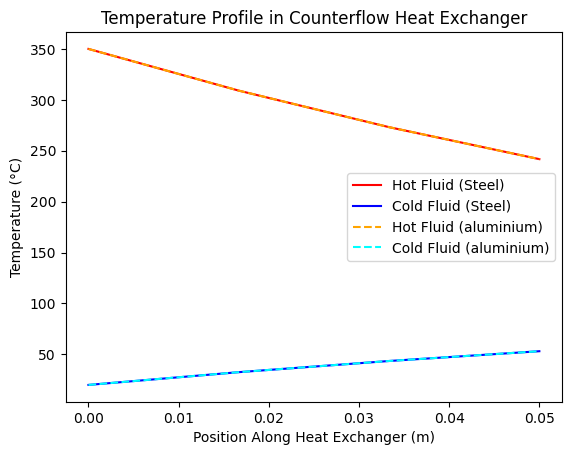

General information:
Number of layers: 4
Height: 5.00 cm
Pressure drop (hot): 100.00 Pa
Pressure drop (cold): 320.00 Pa

Results for Steel:
Total Heat Transfer: 2333.84 Watts
Log Mean Temperature Difference: 252.77 °C
Total Weight of the Heat Exchanger: 2.40 kg

Results for aluminium:
Total Heat Transfer: 2333.84 Watts
Log Mean Temperature Difference: 252.77 °C
Total Weight of the Heat Exchanger: 1.02 kg


In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def heat_exchanger_simulation(overall_heat_transfer_coefficient, layer_weight):
    # Given parameters
    mass_flow_rate_hot = 0.020  # Mass flow rate of hot fluid (kg/s)
    mass_flow_rate_cold = 0.07  # Mass flow rate of cold fluid (kg/s)
    inlet_temp_hot = 623.15  # Inlet temperature of hot fluid (K)
    inlet_temp_cold = 293.15  # Inlet temperature of cold fluid (K)
    specific_heat_hot = 1078.0  # Specific heat capacity of hot fluid (J/(kg*K))
    specific_heat_cold = 1007.0  # Specific heat capacity of cold fluid (J/(kg*K))
    contact_area = 0.023808  # Contact area for each layer (m^2)
    num_layers = 4  # Number of layers in series
    layer_length = 0.0125  # Length of each layer (m)
    pressure_drop_cold = 80 #(Pa)
    pressure_drop_hot = 25 #(Pa}

    # Calculate thermal resistance for each layer
    thermal_resistances = layer_length / (overall_heat_transfer_coefficient * contact_area)

    # Set initial condition
    initial_condition = [inlet_temp_hot]

    # Define the ODE system
    def heat_exchanger_ode(T, x):
        # Calculate total thermal resistance for all layers
        total_thermal_resistance = np.sum(thermal_resistances)

        # Calculate dT/dx using the thermal resistance approach
        dTdx = -(T - inlet_temp_cold) / (total_thermal_resistance * mass_flow_rate_hot * specific_heat_hot)
        return dTdx

    # Define positions along the heat exchanger
    x_positions = np.linspace(0, num_layers * layer_length, num_layers)

    # Solve the ODE
    result = odeint(heat_exchanger_ode, initial_condition, x_positions)

    # Extract temperatures and convert to Celsius
    temp_hot = result[:, 0] - 273.15
    temp_cold = (inlet_temp_cold + (inlet_temp_hot - result[:, 0]) * (mass_flow_rate_hot / mass_flow_rate_cold) * (specific_heat_hot / specific_heat_cold)) - 273.15

    # Calculate total heat transfer
    total_heat_transfer = mass_flow_rate_hot * specific_heat_hot * (inlet_temp_hot - result[-1, 0])

    # Calculate log mean temperature difference
    delta_T_1 = temp_hot[0] - temp_cold[0]
    delta_T_2 = temp_hot[-1] - temp_cold[-1]
    log_mean_temp_difference = (delta_T_1 - delta_T_2) / np.log(delta_T_1 / delta_T_2)

    # Calculate total weight of the heat exchanger
    total_weight = num_layers * layer_weight
    
    #Calculate total pressure drop
    pressure_total_hot = num_layers * pressure_drop_hot
    pressure_total_cold = num_layers * pressure_drop_cold

    return x_positions, temp_hot, temp_cold, total_heat_transfer, log_mean_temp_difference, total_weight, pressure_total_hot, pressure_total_cold, num_layers, layer_length

# Given parameters for steel
overall_heat_transfer_coefficient_steel = 90  # Overall heat transfer coefficient for steel (W/(m^2*K))
layer_weight_steel = 0.599  # Weight of each layer for steel (kg)

# Given parameters for aluminium
overall_heat_transfer_coefficient_aluminium = 90  # Overall heat transfer coefficient for aluminium (W/(m^2*K))
layer_weight_aluminium = 0.255  # Weight of each layer for aluminium (kg)

# Run simulations for steel and aluminium
result_steel = heat_exchanger_simulation(overall_heat_transfer_coefficient_steel, layer_weight_steel)
result_aluminium = heat_exchanger_simulation(overall_heat_transfer_coefficient_aluminium, layer_weight_aluminium)

# Plotting
plt.plot(result_steel[0], result_steel[1], label="Hot Fluid (Steel)", color="red")
plt.plot(result_steel[0], result_steel[2], label="Cold Fluid (Steel)", color="blue")

plt.plot(result_aluminium[0], result_aluminium[1], label="Hot Fluid (aluminium)", color="orange", linestyle="--")
plt.plot(result_aluminium[0], result_aluminium[2], label="Cold Fluid (aluminium)", color="cyan", linestyle="--")

plt.xlabel("Position Along Heat Exchanger (m)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Profile in Counterflow Heat Exchanger")
plt.legend()
plt.show()

print("General information:")
print("Number of layers: {:.0f}".format(result_steel[8]))
print("Height: {:.2f} cm".format(100*result_steel[9]*result_steel[8]))
print("Pressure drop (hot): {:.2f} Pa".format(result_steel[6]))
print("Pressure drop (cold): {:.2f} Pa\n".format(result_steel[7]))


# Display results for steel
print("Results for Steel:")
print("Total Heat Transfer: {:.2f} Watts".format(result_steel[3]))
print("Log Mean Temperature Difference: {:.2f} °C".format(result_steel[4]))
print("Total Weight of the Heat Exchanger: {:.2f} kg".format(result_steel[5]))

# Display results for aluminium
print("\nResults for aluminium:")
print("Total Heat Transfer: {:.2f} Watts".format(result_aluminium[3]))
print("Log Mean Temperature Difference: {:.2f} °C".format(result_aluminium[4]))
print("Total Weight of the Heat Exchanger: {:.2f} kg".format(result_aluminium[5]))
